In [1]:
# GENSIM
# INSTRUCTIONS: run this code, stop the runtime, then skip this cell and run the
# second cell.
!pip install --no-cache-dir --upgrade numpy scipy gensim
!pip install --no-cache-dir pandas==2.2.2  # Reinstall the required pandas version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 103.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of 

In [1]:
# Install of a visualizer for LDA
!pip install pyLDAvis

In [1]:
# Common imports
import numpy as np
import pandas as pd
import gensim
import zipfile as zp
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Gensim version:", gensim.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.2
Gensim version: 4.3.3


In [3]:
# From Spacy Tutorial Notebook (author: Jerónimo Arenas-García)
#To wrap long text lines
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

#For fancy table Display
%load_ext google.colab.data_table

In [6]:
from google.colab import drive
drive.mount('/content/drive')

# folder_path= ('/content/drive/Othercomputers/Asus Zenbook 14/Degree/Y3 S2/ML Applications/Project')
folder_path = "/content/drive/My Drive/MLA Project"
os.chdir(folder_path)

Mounted at /content/drive


In [7]:
# Recover stored csv to start from this point
reviews_df = pd.read_csv('all_reviews_lemmas_2.csv')

In [8]:
# Check number of reviews after recovering csv
print(len(reviews_df))

111613


In [9]:
# Control whether the function has created 'nltl_lemmas'= None
print(len(reviews_df[reviews_df['nltk_lemmas'].isnull()]['review']))

2063


In [10]:
# Eliminate reviews that only have stars, not text
reviews_df = reviews_df[reviews_df['nltk_lemmas'].notna()]

In [11]:
# Check no more reviews without text
print(len(reviews_df[reviews_df['nltk_lemmas'].isnull()]['review']))

0


In [12]:
# Need to update the index in the dataframe to avoid problems when starting BoW
reviews_df = reviews_df.reset_index(drop=True)

In [62]:
review_idx=0
print('============= Review =============')
print(reviews_df.loc[review_idx, 'review'], '\n')

print('============= Lemmas Nltk =============')
print(reviews_df.loc[review_idx, 'nltk_lemmas']
)

============= Review =============
This has been my go-to recipe for a long time (it was originally posted long ago). It is delicious as it stands, but is so adaptable. I generally cut the recipe in half and make it in an 8x8 or 9x9 pan. I have added, in no particular order, minced jalapenos, a can of drained Rotel tomatoes and chilis, green peppers, red peppers, turkey sausage, hot sausage, bacon, and various cheeses (regular or low-fat), depending on what I have on hand. (Please note: I have never added these all at once; this is a list of possible additions you might have on hand. And if you're halving the recipe and are enthusiastic in your additions, use 5 eggs instead of 4.) Also, I use the packaged southwest-style hash browns in place of the plain hash browns. One suggestion: the only thing I found among the cheeses that I couldn't replace is the cottage cheese. It really is essential for creaminess. The one time I made this without, the casserole was brick-like, edible, but not

In [14]:
# When uploading from csv, list in lemmas col is read as a string, need to transform it into a python list
import ast
reviews_df['nltk_lemmas'] = reviews_df['nltk_lemmas'].apply(ast.literal_eval)

In [15]:
# Group by 'recipe_id' and 'recipe', and combine all 'nltk_lemmas' lists into one
grouped_lemmas = reviews_df.groupby(['recipe_id', 'recipe'])['nltk_lemmas'].apply(lambda lemmas: sum(lemmas, []))

# Create a new DataFrame, reset index
recipes_corpus_df = grouped_lemmas.reset_index()

# Check the result
recipes_corpus_df.head()

,recipe_id,recipe,nltk_lemmas
0,1,Cheesy Amish Breakfast Casserole,"[recipe, long, time, post, delicious, stand, a..."
1,2,Best Vinegar Coleslaw,"[rate, recipe, star, base, make, write, make, ..."
2,3,Pennsylvania-Dutch Pickled Beets and Eggs,"[eggs, good, taste, add, sugar, 2nd, time, let..."
3,4,Amish Macaroni Salad,"[make, version, today, ingredient, celery, see..."
4,5,Amish Friendship Bread Starter,"[easy, make, stink, age, follow, advice, revie..."


In [217]:
len(recipes_corpus_df)

824

In [17]:
# Upload information about the recipes
recipes_df = pd.read_csv('recipe_df.csv')

In [18]:
recipes_df.head()

,recipe_id,Title,Cuisine,prep_time,cook_time,total_time,servings,calories,fat,carbs,protein
0,1,Cheesy Amish Breakfast Casserole,Amish and Mennonite,10 mins,55 mins,1 hr 15 mins,12,314.0,23g,12g,22g
1,2,Best Vinegar Coleslaw,Amish and Mennonite,15 mins,5 mins,20 mins,8,224.0,9g,35g,2g
2,3,Pennsylvania-Dutch Pickled Beets and Eggs,Amish and Mennonite,15 mins,30 mins,2 days 45 mins,8,252.0,5g,45g,7g
3,4,Amish Macaroni Salad,Amish and Mennonite,15 mins,10 mins,1 hr 25 mins,6,532.0,25g,66g,9g
4,5,Amish Friendship Bread Starter,Amish and Mennonite,30 mins,NaN,10 days 40 mins,120,34.0,0g,8g,1g


In [19]:
len(recipes_df)

886

In [20]:
# Look into the difference in length
recipes_ids_all = set(recipes_df['recipe_id'])
recipes_ids_with_reviews = set(grouped_lemmas.index.get_level_values('recipe_id'))

In [21]:
missing_ids = recipes_ids_all - recipes_ids_with_reviews
recipes_missing_reviews = recipes_df[recipes_df['recipe_id'].isin(missing_ids)]


In [22]:
recipes_missing_reviews.head()

,recipe_id,Title,Cuisine,prep_time,cook_time,total_time,servings,calories,fat,carbs,protein
26,27,Our Most Traditional Amish and Mennonite Recipes,Amish and Mennonite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,39,7 Ways to Use Your Amish Friendship Bread Starter,Amish and Mennonite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,43,Amish Potato Soup,Amish and Mennonite,25 mins,1 hr,1 hr 25 mins,5,460.0,25g,34g,25g
51,52,Red Pepper and Cabbage Pickle,Amish and Mennonite,45 mins,1 hr 30 mins,10 hrs 15 mins,48,106.0,5g,15g,2g
65,66,What Is Dulce de Leche and How Do You Make It?,Argentinian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some recipes do not appear reflected in recipes_corpus_df, as they have no reviews. Need to recover the information from both datasets using recipe_id, not the index.

In [23]:
# Import libraries
import gc
import scipy
from gensim.corpora import Dictionary

In [ ]:
# Create new dictionary and BoW for new dataframe
from gensim.corpora import Dictionary

# Create a new Gensim dictionary
D_recipes = Dictionary(recipes_corpus_df['nltk_lemmas'])

# Filter extremes
D_recipes.filter_extremes(no_below=20, no_above=0.8)

# Create new BoW
recipes_bow = [D_recipes.doc2bow(doc) for doc in recipes_corpus_df['nltk_lemmas']]


In [ ]:
# OBS: run to store the corpus in an efficient way:
# Once the final dataset is created, use for efficiency and easy integration with LDA:
from gensim.corpora import MmCorpus

# Save
MmCorpus.serialize('recipes_corpus.mm', recipes_bow)

# Save the Gensim dictionary
D_recipes.save("recipes_dictionary.dict")

In [24]:
# OBS: to run only if loading a previouly calculated Dict and Bow
from gensim.corpora import Dictionary, MmCorpus

D_recipes = Dictionary.load("recipes_dictionary.dict")
corpus_bow_recipes = MmCorpus("recipes_corpus.mm")

# Recover the corpus
corpus_recipes = [[D_recipes[id] for id, _ in doc] for doc in corpus_bow_recipes]

# Convert to plain list to recover original bow, to be used in some methods instead of the MmCorpus object
recipes_bow = list(corpus_bow_recipes)

In [60]:
grouped_vocab = list(D_recipes.token2id.keys())

print(grouped_vocab[0:30])

['able', 'adapt', 'adaptable', 'added', 'addictive', 'adding', 'addition', 'additional', 'adjust', 'adjustment', 'adult', 'afraid', 'air', 'allow', 'allrecipes', 'alternative', 'aluminum', 'always', 'amaze', 'amazing', 'amish', 'amount', 'annual', 'anything', 'approve', 'ask', 'assemble', 'ate', 'avocado', 'avoid']


In [25]:
len(corpus_recipes)

824

In [ ]:
# LDA - TOPIC MODELING

In [ ]:
from gensim.models.ldamodel import LdaModel
# To be adjusted, initial value set to 5.
num_topics = 5

# id2word: dictionary that contains (int, str)
ldag = LdaModel(corpus=corpus_bow_recipes, id2word=D_recipes, num_topics=num_topics, passes=20)

In [ ]:
ldag.save("lda_model_recipe_reviews.gensim")

In [ ]:
# To upload the previously saved model
ldag = LdaModel.load("lda_model_recipe_reviews.gensim")

In [ ]:
topn = 10
for i in range(num_topics):
    print(f'\nTopic {i}')
    for word, weight in ldag.show_topic(i, topn=topn):
        print(f"{word:15} {weight:.4f}")

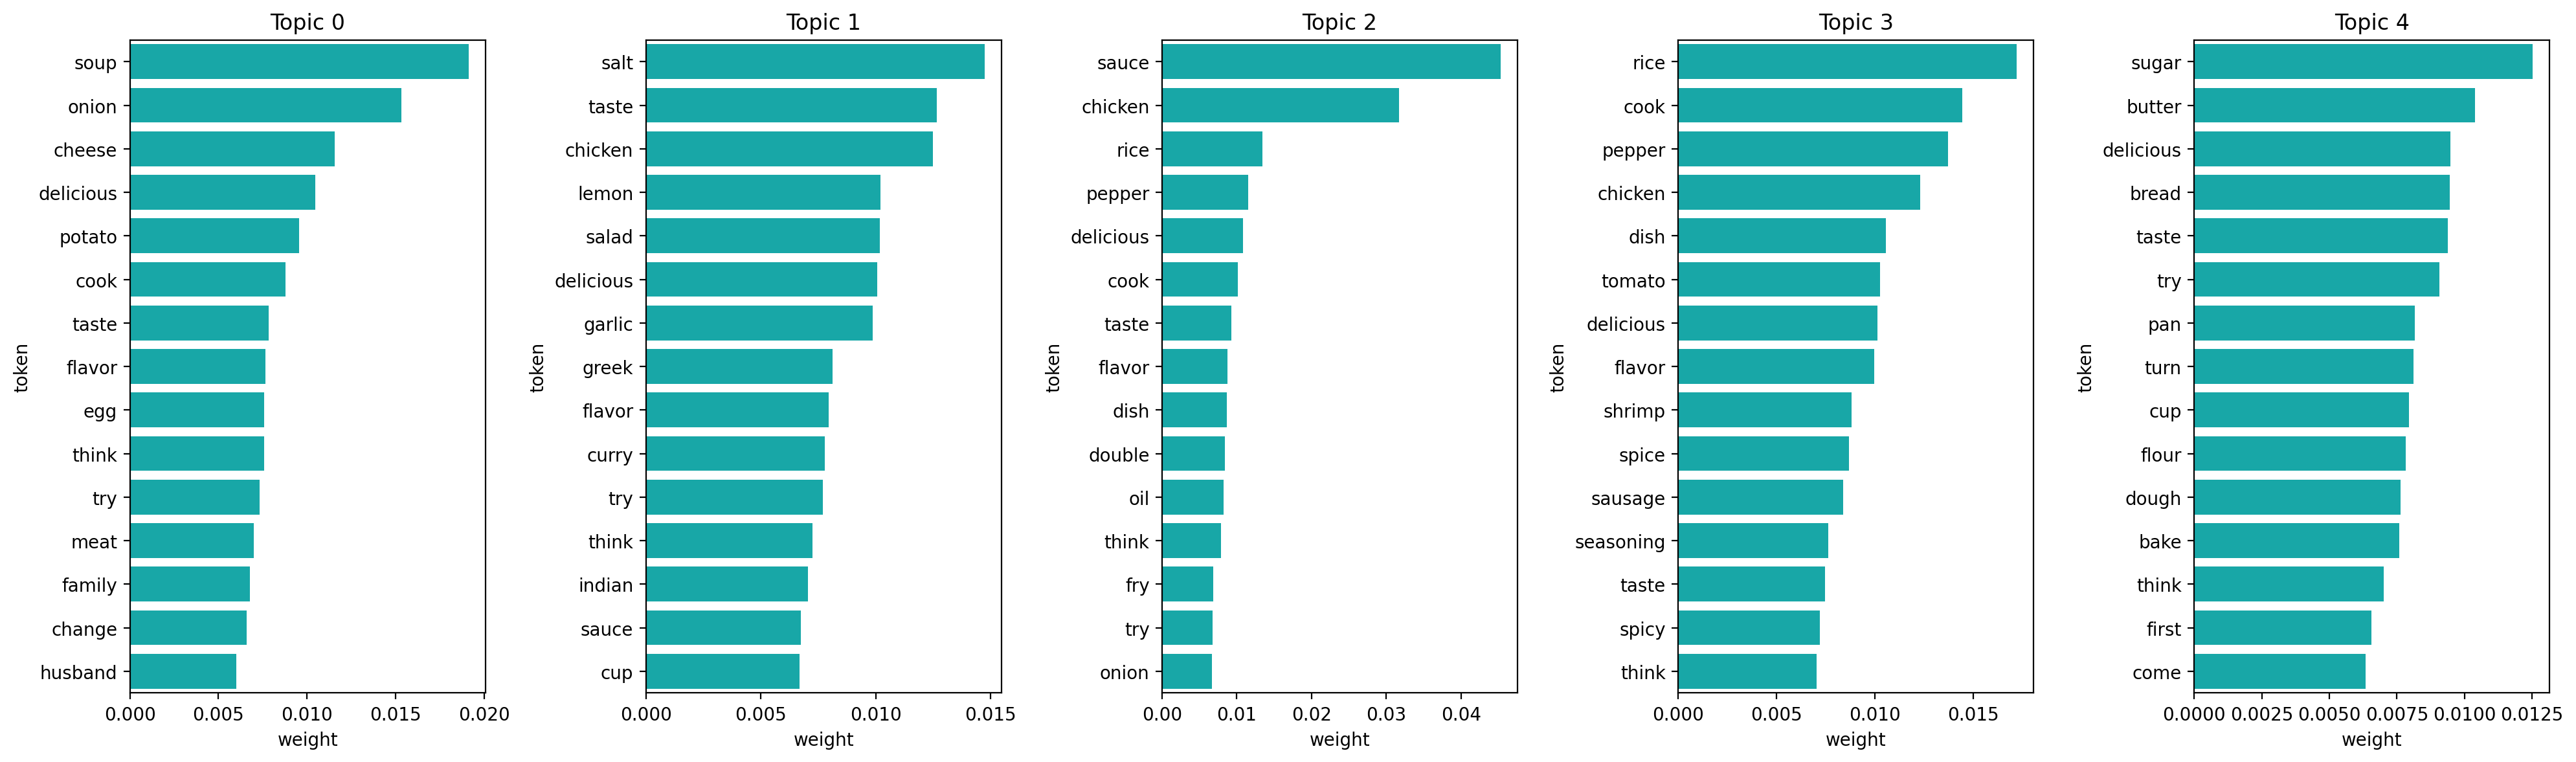

In [ ]:
topn=15

# For 5 topics
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharex=False)

for i in range(5):
    df = pd.DataFrame(ldag.show_topic(i, topn=topn), columns=["token", "weight"])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[i])
    axes[i].set_title(f'Topic {i}')

plt.tight_layout()
plt.show()


In [26]:
# Import libraries for LDA visualization graph
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [ ]:
vis_data = gensimvis.prepare(ldag, corpus_bow_recipes, D_recipes)
pyLDAvis.display(vis_data)

In [29]:
# Filter common words that do not add value
# List of custom stopwords
custom_stopwords = {'great', 'easy', 'little', 'next', 'get', 'taste', 'flavor', 'delicious', 'think', 'try'}

# Re-filter the lemmas
reviews_df['filtered_nltk_lemmas'] = reviews_df['nltk_lemmas'].apply(
    lambda lemmas: [word for word in lemmas if word not in custom_stopwords]
)


In [32]:
# Rebuild the dataframe for all reviews by recipe
# Group by 'recipe_id' and 'recipe', and combine all 'nltk_lemmas' lists into one
grouped_lemmas = reviews_df.groupby(['recipe_id', 'recipe'])['filtered_nltk_lemmas'].apply(lambda lemmas: sum(lemmas, []))

# Create a new DataFrame
recipes_corpus_df = grouped_lemmas.reset_index()

# Check the result
print(recipes_corpus_df.head())

   recipe_id                                     recipe  \
0          1           Cheesy Amish Breakfast Casserole   
1          2                      Best Vinegar Coleslaw   
2          3  Pennsylvania-Dutch Pickled Beets and Eggs   
3          4                       Amish Macaroni Salad   
4          5             Amish Friendship Bread Starter   

                                filtered_nltk_lemmas  
0  [recipe, long, time, post, stand, adaptable, c...  
1  [rate, recipe, star, base, make, write, make, ...  
2  [eggs, good, add, sugar, 2nd, time, let, eggs,...  
3  [make, version, today, ingredient, celery, see...  
4  [make, stink, age, follow, advice, reviewer, c...  


In [33]:
# Rebuild the gensim Dictionary and Bow
# Create new dictionary and BoW for new dataframe
from gensim.corpora import Dictionary

corpus_recipes=recipes_corpus_df['filtered_nltk_lemmas']

# Create a new Gensim dictionary
D_recipes = Dictionary(corpus_recipes)

# Filter extremes
D_recipes.filter_extremes(no_below=20, no_above=0.8)

# Create new BoW
recipes_bow = [D_recipes.doc2bow(doc) for doc in recipes_corpus_df['filtered_nltk_lemmas']]


In [ ]:

# print(corpus_recipes[0])

In [ ]:
# To be adjusted
num_topics = 5

# id2word: dictionary that contains (int, str)
ldag = LdaModel(corpus=recipes_bow, id2word=D_recipes, num_topics=num_topics, passes=20)

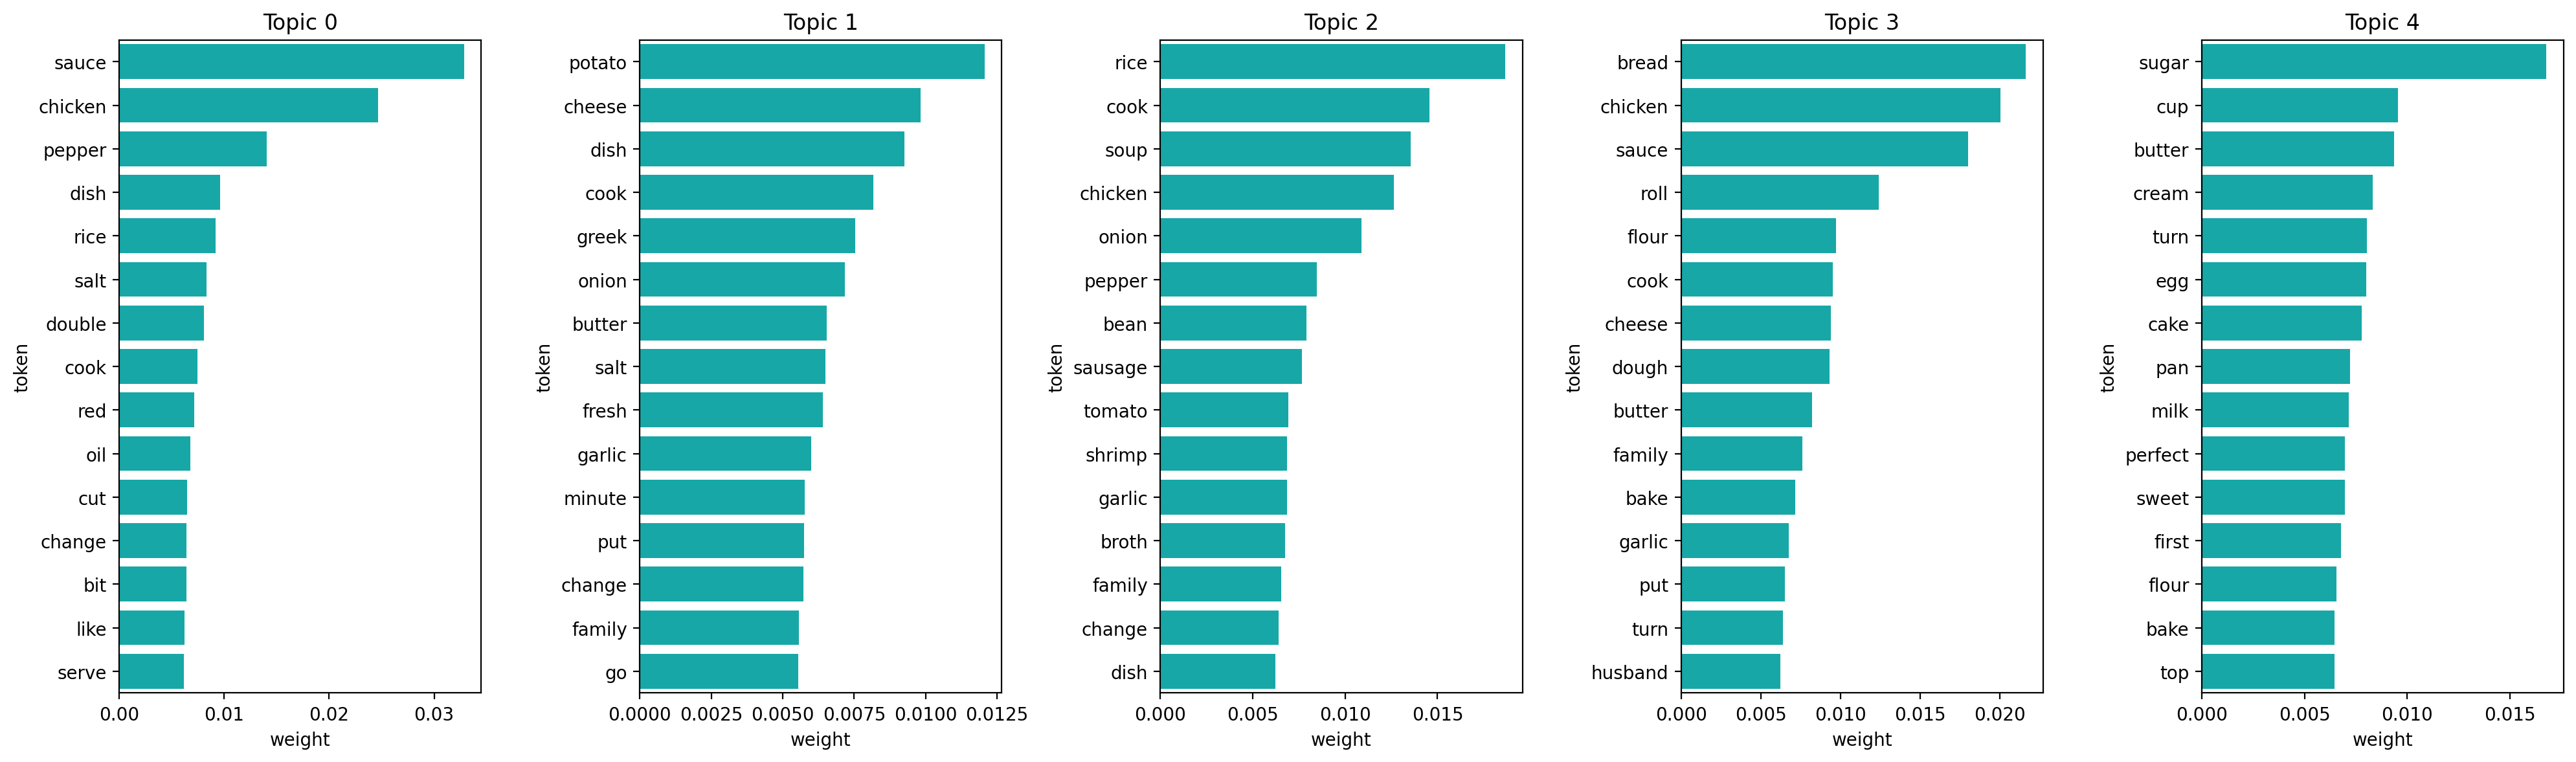

In [ ]:
topn=15

# For 5 topics
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharex=False)

for i in range(num_topics):
    df = pd.DataFrame(ldag.show_topic(i, topn=topn), columns=["token", "weight"])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[i])
    axes[i].set_title(f'Topic {i}')

plt.tight_layout()
plt.show()


In [ ]:
vis_data = gensimvis.prepare(ldag, recipes_bow, D_recipes)
pyLDAvis.display(vis_data)

In [ ]:
topn = 10
for i in range(num_topics):
    print(f'\nTopic {i}')
    for word, weight in ldag.show_topic(i, topn=topn):
        print(f"{word:15} {weight:.4f}")



Topic 0
sauce           0.0328
chicken         0.0246
pepper          0.0140
dish            0.0096
rice            0.0092
salt            0.0083
double          0.0081
cook            0.0075
red             0.0071
oil             0.0068

Topic 1
potato          0.0121
cheese          0.0098
dish            0.0093
cook            0.0082
greek           0.0075
onion           0.0072
butter          0.0065
salt            0.0065
fresh           0.0064
garlic          0.0060

Topic 2
rice            0.0187
cook            0.0146
soup            0.0135
chicken         0.0126
onion           0.0109
pepper          0.0085
bean            0.0079
sausage         0.0077
tomato          0.0069
shrimp          0.0069

Topic 3
bread           0.0216
chicken         0.0201
sauce           0.0180
roll            0.0124
flour           0.0097
cook            0.0095
cheese          0.0094
dough           0.0093
butter          0.0082
family          0.0076

Topic 4
sugar           0.0168
cup         

In [ ]:
# Redo for 6 topics
num_topics = 6

# id2word: dictionary that contains (int, str)
ldag = LdaModel(corpus=recipes_bow, id2word=D_recipes, num_topics=num_topics, passes=20)

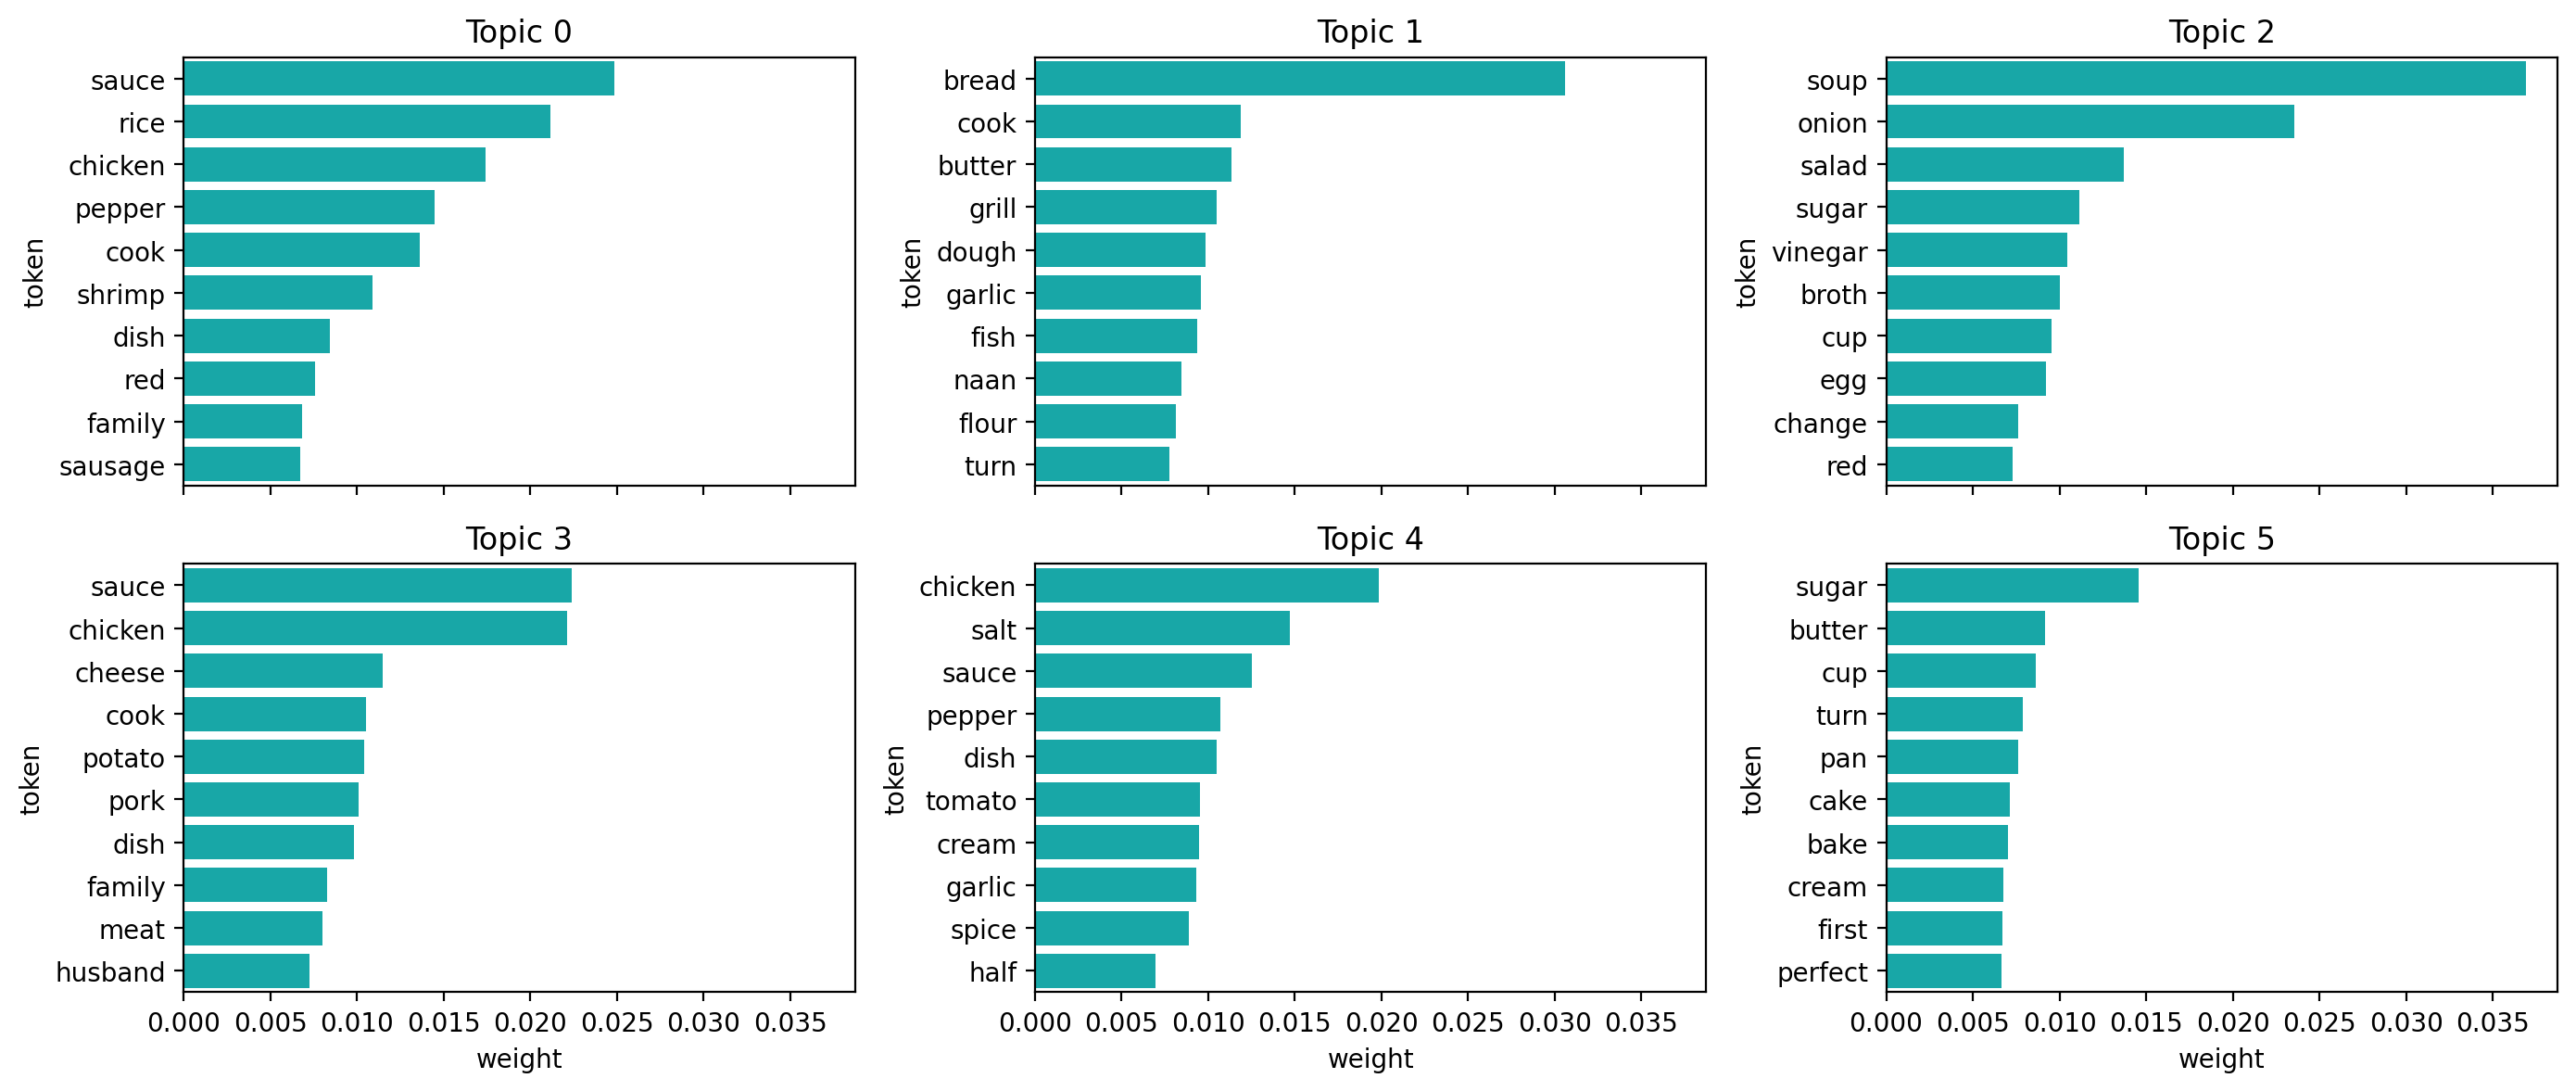

In [ ]:
topn=10

# For 6 topics
fig, axes = plt.subplots(2, 3, figsize=(14, 6), sharex=True)

for i in range(3):
    df = pd.DataFrame(ldag.show_topic(i, topn=topn), columns=["token", "weight"])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[0][i])
    axes[0][i].set_title(f'Topic {i}')

    # Build a dataframe with columns 'token' and 'weight' for topic i + 3
    df = pd.DataFrame(ldag.show_topic(i+3, topn=topn), columns=["token", "weight"])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[1][i])
    axes[1][i].set_title('Topic ' + str(i+3))

plt.tight_layout()
plt.show()

In [ ]:
vis_data = gensimvis.prepare(ldag, recipes_bow, D_recipes)
pyLDAvis.display(vis_data)

In [ ]:
topn = 10
for i in range(num_topics):
    print(f'\nTopic {i}')
    for word, weight in ldag.show_topic(i, topn=topn):
        print(f"{word:15} {weight:.4f}")


Topic 0
sauce           0.0249
rice            0.0212
chicken         0.0174
pepper          0.0145
cook            0.0136
shrimp          0.0109
dish            0.0084
red             0.0076
family          0.0068
sausage         0.0067

Topic 1
bread           0.0306
cook            0.0119
butter          0.0114
grill           0.0105
dough           0.0098
garlic          0.0096
fish            0.0093
naan            0.0085
flour           0.0081
turn            0.0077

Topic 2
soup            0.0369
onion           0.0236
salad           0.0137
sugar           0.0112
vinegar         0.0104
broth           0.0100
cup             0.0095
egg             0.0092
change          0.0076
red             0.0073

Topic 3
sauce           0.0224
chicken         0.0221
cheese          0.0115
cook            0.0105
potato          0.0104
pork            0.0101
dish            0.0098
family          0.0083
meat            0.0080
husband         0.0073

Topic 4
chicken         0.0199
salt        

In [ ]:
# 6 topics make more sense than 5, see the relevant recipes for each topic to get more information

To get a better idea of the meaning of each topic, we can look at the recipes that influence each topic the most.

In [27]:
def most_relevant_recipes(ldag, topicid, corpus_bow, ndocs=10):
    """This function returns the most relevant documents in corpus_bow

    : ldag: The trained topic model object provided by gensim
    : topicid: The topic for which we want to find the most relevant documents
    : corpus_bow: The BoW representation of documents in Gensim format
    : ndocs: Number of most relevant documents to return

    : Returns: A list with the identifiers of the most relevant documents
    """
    # Create list to return
    most_relevant_recipes=[]
    print('Topic composition is:')
    items= [word for word, weight in ldag.show_topic(topicid)]
    print(items)
    # print(ldag.show_topic(topicid))

    # Compute topic weight for each document and sort by relevance
    sorted_docs = sorted(
        ((i, dict(ldag[doc]).get(topicid, 0)) for i, doc in enumerate(corpus_bow)),
        key=lambda x: x[1],
        reverse=True
    )

    # Extract top document IDs
    most_relevant_recipes = [doc_id for doc_id, _ in sorted_docs[:ndocs]]
    return most_relevant_recipes

In [ ]:
# Find the most relevant recipes for the topics
ndocs = 3

#Print titles of selected recipes
for topic_id in range(num_topics):
    print(f"\nTopic {topic_id}:")

    recipe_ids = most_relevant_recipes(ldag, topic_id, recipes_bow, ndocs=ndocs)

    for id in recipe_ids:
        print('-', recipes_corpus_df.iloc[id]['recipe'])


Topic 0:
Computing most relevant recipes for Topic 0
Topic composition is:
['sauce', 'rice', 'chicken', 'pepper', 'cook', 'shrimp', 'dish', 'red', 'family', 'sausage']
- Szechuan Beef
- Shrimp with Broccoli in Garlic Sauce
- Szechwan Shrimp

Topic 1:
Computing most relevant recipes for Topic 1
Topic composition is:
['bread', 'cook', 'butter', 'grill', 'dough', 'garlic', 'fish', 'naan', 'flour', 'turn']
- Chef John's Cuban Bread
- Danish Rugbrod (Rye Bread) for the Bread Machine
- Naan

Topic 2:
Computing most relevant recipes for Topic 2
Topic composition is:
['soup', 'onion', 'salad', 'sugar', 'vinegar', 'broth', 'cup', 'egg', 'change', 'red']
- Amish Macaroni Salad
- Restaurant-Style French Onion Soup
- French Onion Soup Gratinée

Topic 3:
Computing most relevant recipes for Topic 3
Topic composition is:
['sauce', 'chicken', 'cheese', 'cook', 'potato', 'pork', 'dish', 'family', 'meat', 'husband']
- Real Poutine
- Greek Beef Stuffed Onions (Salantourmasi)
- Chicken Cordon Bleu

Topic

In [ ]:
# Analyze coherence
from gensim.models.coherencemodel import CoherenceModel

coherencemodel = CoherenceModel(ldag, texts=corpus_recipes, dictionary=D_recipes, coherence='c_v')
print('The coherence of the trained model is', coherencemodel.get_coherence())

The coherence of the trained model is 0.347537206350051


Training LDA model with 3 topics...
Coherence score for 3 topics: 0.3431
Training LDA model with 4 topics...
Coherence score for 4 topics: 0.3259
Training LDA model with 5 topics...
Coherence score for 5 topics: 0.3419
Training LDA model with 6 topics...
Coherence score for 6 topics: 0.3608
Training LDA model with 7 topics...
Coherence score for 7 topics: 0.3557
Training LDA model with 8 topics...
Coherence score for 8 topics: 0.3682
Training LDA model with 9 topics...
Coherence score for 9 topics: 0.3602
Training LDA model with 10 topics...
Coherence score for 10 topics: 0.3531


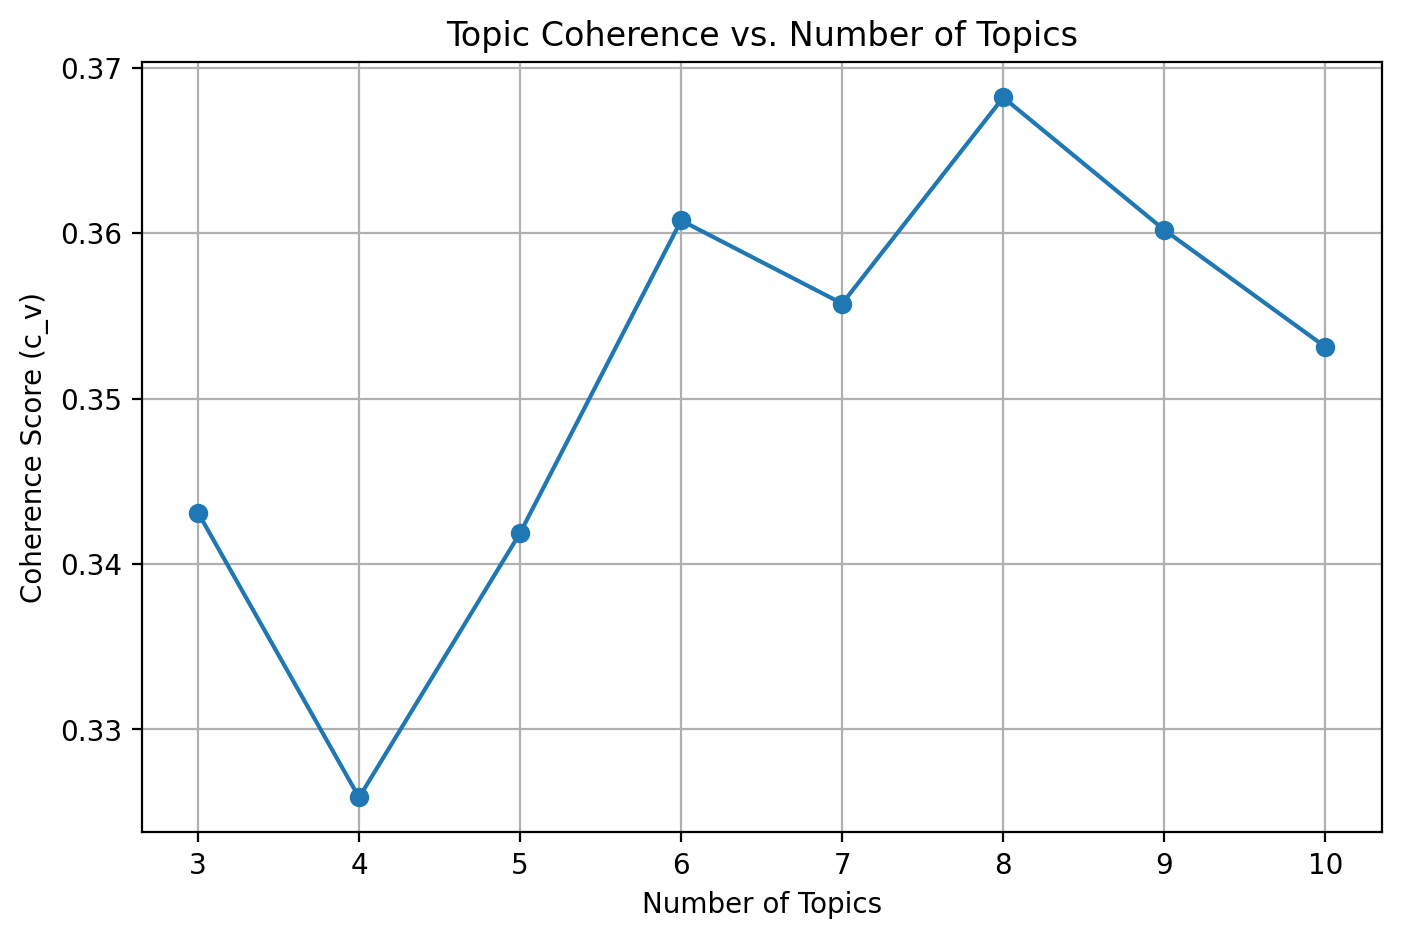

In [ ]:
# Define different topic numbers to test
n_topics = [3, 4, 5, 6, 7, 8, 9, 10]
coherence_scores = []

# Iterate over each topic count
for num_topics in n_topics:
    print(f"Training LDA model with {num_topics} topics...")

    # Train LDA model
    ldag = LdaModel(corpus=recipes_bow, id2word=D_recipes, num_topics=num_topics, passes=10, random_state=42)

    # Compute coherence score
    coherencemodel = CoherenceModel(model=ldag, texts=corpus_recipes, dictionary=D_recipes, coherence='c_v')
    coherence_score = coherencemodel.get_coherence()

    # Store results
    coherence_scores.append(coherence_score)
    print(f"Coherence score for {num_topics} topics: {coherence_score:.4f}")

# Plot coherence scores
plt.figure(figsize=(8, 5))
plt.plot(n_topics, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("Topic Coherence vs. Number of Topics")
plt.grid(True)
plt.show()


In [ ]:
# Redo for 8 topics
num_topics = 8

# id2word: dictionary that contains (int, str)
ldag = LdaModel(corpus=recipes_bow, id2word=D_recipes, num_topics=num_topics, passes=20)

In [ ]:
ldag.save("lda_recipes_8topics.model")


In [28]:
# OBS: run to recover model
from gensim.models import LdaModel

ldag = LdaModel.load("lda_recipes_8topics.model")

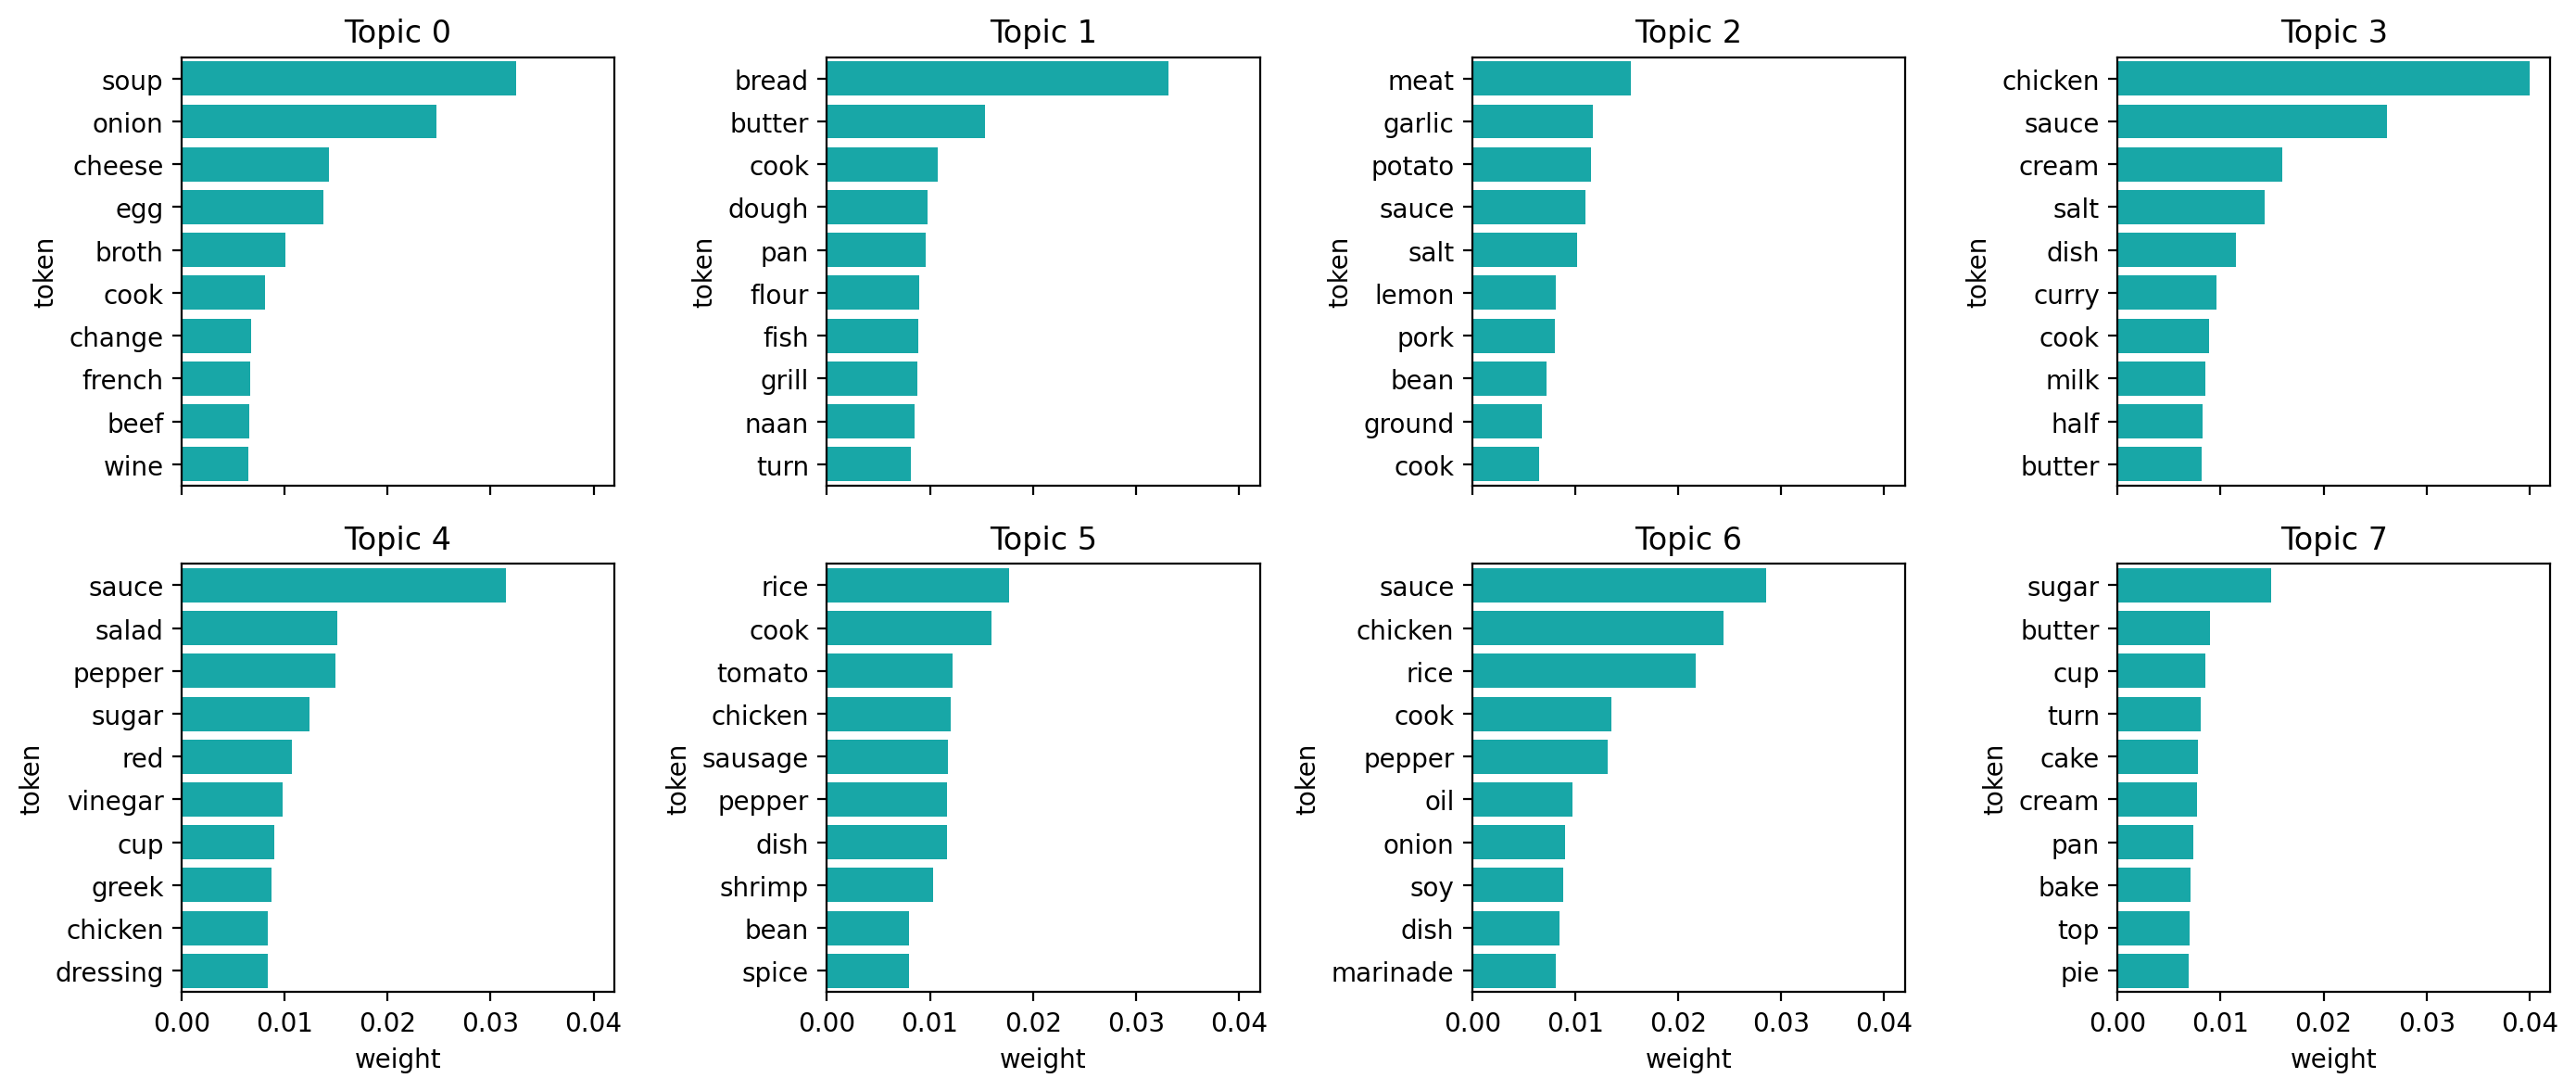

In [176]:
# OBS: if running from uploading saved model for 8 topics, need to run the cells that filter custom stopwords and reconstruct Gensim Dictionary
num_topics = 8
topn=10

# For 8 topics
fig, axes = plt.subplots(2, 4, figsize=(14, 6), sharex=True)

for i in range(4):
    df = pd.DataFrame(ldag.show_topic(i, topn=topn), columns=["token", "weight"])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[0][i])
    axes[0][i].set_title(f'Topic {i}')

    # Build a dataframe with columns 'token' and 'weight' for topic i + 4
    df = pd.DataFrame(ldag.show_topic(i+4, topn=topn), columns=["token", "weight"])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[1][i])
    axes[1][i].set_title('Topic ' + str(i+4))

plt.tight_layout()
plt.show()

In [174]:
# OBS: if running from uploading saved model for 8 topics, need to run the cells that filter custom stopwords and reconstruct Gensim Dictionary
import pyLDAvis.gensim as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(ldag, recipes_bow, D_recipes)
pyLDAvis.display(vis_data)

In [ ]:
topn = 10
for i in range(num_topics):
    print(f'\nTopic {i}')
    for word, weight in ldag.show_topic(i, topn=topn):
        print(f"{word:15} {weight:.4f}")


Topic 0
soup            0.0325
onion           0.0247
cheese          0.0143
egg             0.0137
broth           0.0101
cook            0.0081
change          0.0068
french          0.0067
beef            0.0065
wine            0.0064

Topic 1
bread           0.0332
butter          0.0154
cook            0.0107
dough           0.0098
pan             0.0096
flour           0.0089
fish            0.0089
grill           0.0087
naan            0.0085
turn            0.0082

Topic 2
meat            0.0154
garlic          0.0117
potato          0.0115
sauce           0.0110
salt            0.0102
lemon           0.0081
pork            0.0080
bean            0.0072
ground          0.0068
cook            0.0065

Topic 3
chicken         0.0400
sauce           0.0262
cream           0.0160
salt            0.0143
dish            0.0115
curry           0.0096
cook            0.0089
milk            0.0085
half            0.0082
butter          0.0081

Topic 4
sauce           0.0315
salad       

In [34]:
recipes_corpus_df = recipes_corpus_df.set_index('recipe_id')
recipes_df = recipes_df.set_index('recipe_id')


In [37]:
recipes_corpus_df.head()

,recipe,filtered_nltk_lemmas
recipe_id,,
1,Cheesy Amish Breakfast Casserole,"[recipe, long, time, post, stand, adaptable, c..."
2,Best Vinegar Coleslaw,"[rate, recipe, star, base, make, write, make, ..."
3,Pennsylvania-Dutch Pickled Beets and Eggs,"[eggs, good, add, sugar, 2nd, time, let, eggs,..."
4,Amish Macaroni Salad,"[make, version, today, ingredient, celery, see..."
5,Amish Friendship Bread Starter,"[make, stink, age, follow, advice, reviewer, c..."


In [59]:
# Find the most relevant recipes for the topics
ndocs = 3
num_topics=8

#Print titles of selected recipes
for topic_id in range(num_topics):
    print(f"\nTopic {topic_id}:")

    recipe_ids = most_relevant_recipes(ldag, topic_id, recipes_bow, ndocs=ndocs)

    for id in recipe_ids:
        # print(id)
        recipe_id = recipes_corpus_df.index[id]
        # print(recipe_id)
        title = recipes_corpus_df.loc[[recipe_id]]['recipe'].values[0]
        cuisine = recipes_df.loc[recipe_id, 'Cuisine']
        print('-', "Recipe:", title, " - Cuisine: ", cuisine)



Topic 0:
Topic composition is:
['soup', 'onion', 'cheese', 'egg', 'broth', 'cook', 'change', 'french', 'beef', 'wine']
- Recipe: Restaurant-Style French Onion Soup  - Cuisine:  French
- Recipe: French Onion Soup Gratinée  - Cuisine:  French
- Recipe: Rich and Simple French Onion Soup  - Cuisine:  French

Topic 1:
Topic composition is:
['bread', 'butter', 'cook', 'dough', 'pan', 'flour', 'fish', 'grill', 'naan', 'turn']
- Recipe: Amish Bread  - Cuisine:  Amish and Mennonite
- Recipe: Chef John's Cuban Bread  - Cuisine:  Cuban
- Recipe: Amish Butter and Egg Dinner Rolls  - Cuisine:  Amish and Mennonite

Topic 2:
Topic composition is:
['meat', 'garlic', 'potato', 'sauce', 'salt', 'lemon', 'pork', 'bean', 'ground', 'cook']
- Recipe: Real Hummus  - Cuisine:  Greek
- Recipe: Black Bean Hummus  - Cuisine:  Greek
- Recipe: Traditional Gyro Meat  - Cuisine:  Greek

Topic 3:
Topic composition is:
['chicken', 'sauce', 'cream', 'salt', 'dish', 'curry', 'cook', 'milk', 'half', 'butter']
- Recipe: 

We can see that four topics recover recipes from a given cuisine, three are related to a given kind of meal (bread, salad, dessert), and one is more related to a technique (marinades).

In [ ]:
# Save
MmCorpus.serialize('recipes_corpus_filtered.mm', recipes_bow)

# Save the Gensim dictionary
D_recipes.save("recipes_dictionary_filtered.dict")

In [ ]:
corpus_recipes.to_pickle("corpus_recipes.pkl")

In [39]:
# To load
from gensim.corpora import MmCorpus

corpus_bow_recipes = MmCorpus("recipes_corpus_filtered.mm")
D_recipes = Dictionary.load("recipes_dictionary_filtered.dict")
# Recover the corpus
corpus_recipes = pd.read_pickle("corpus_recipes.pkl")